# MCB Signal Extraction
---

In [1]:
%%time
import glob, datetime, warnings, utm, mcaap
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from obspy import *
from obspy.core import *
from scipy import signal

warnings.filterwarnings('ignore')

# Global variables where data are stored
MCB_dir = '/Volumes/Extreme SSD/McAAP/Summer_2021/'

CPU times: user 7.32 s, sys: 6.64 s, total: 14 s
Wall time: 23.8 s


## Plotting MCB Data for Each Day
---
#### Need to determine days in which observations were made

<IPython.core.display.Javascript object>


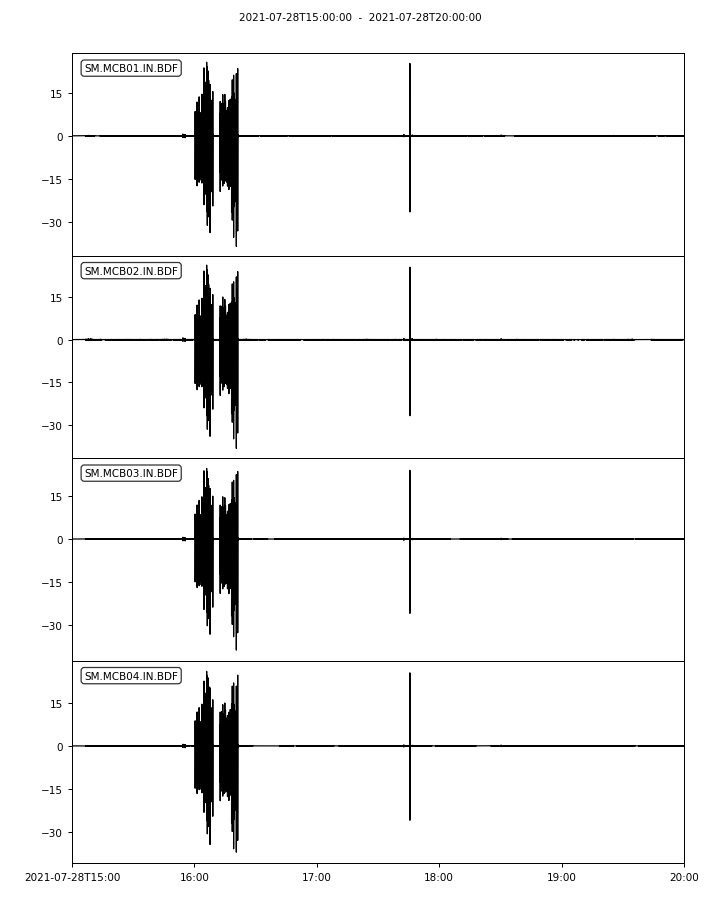

<IPython.core.display.Javascript object>


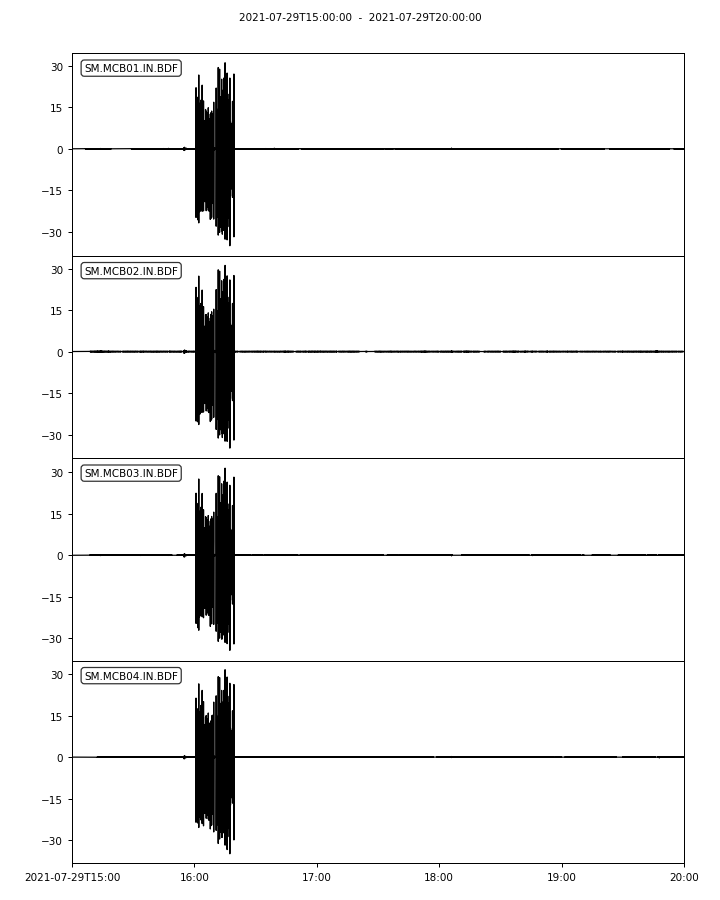

<IPython.core.display.Javascript object>


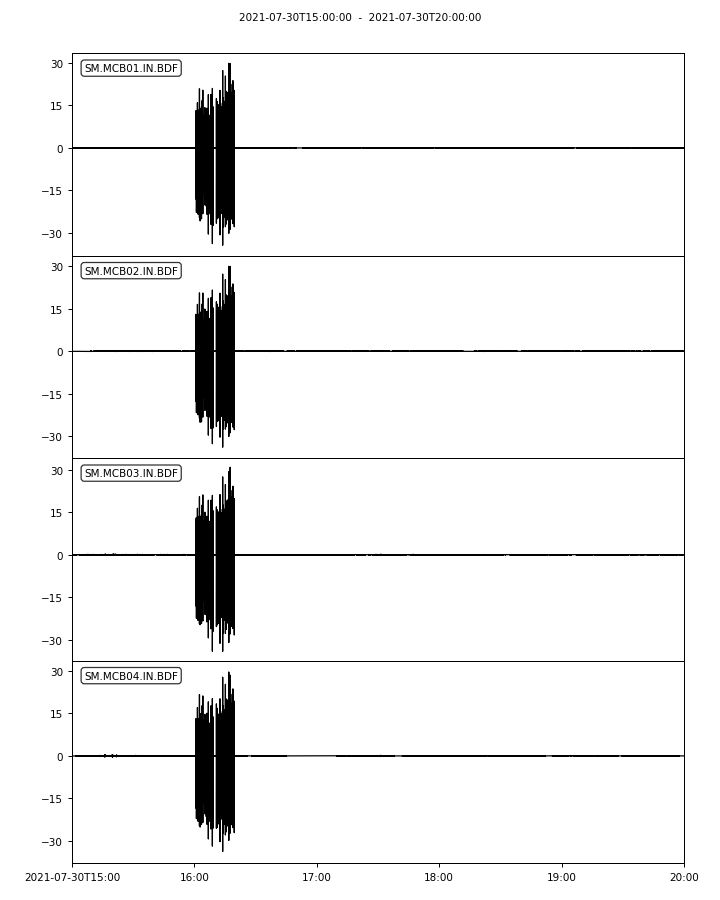

<IPython.core.display.Javascript object>


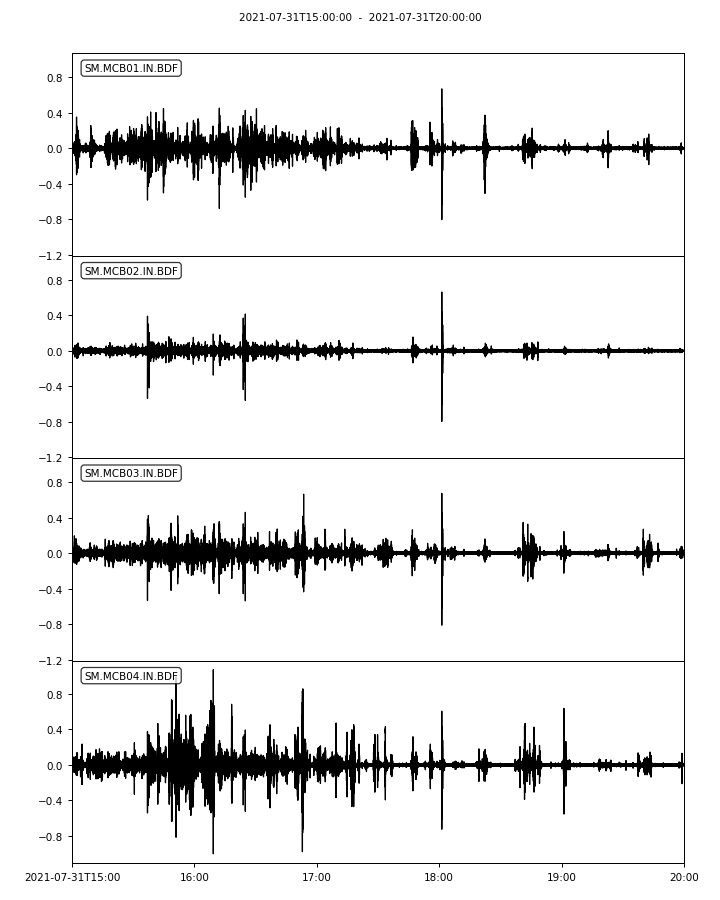

<IPython.core.display.Javascript object>


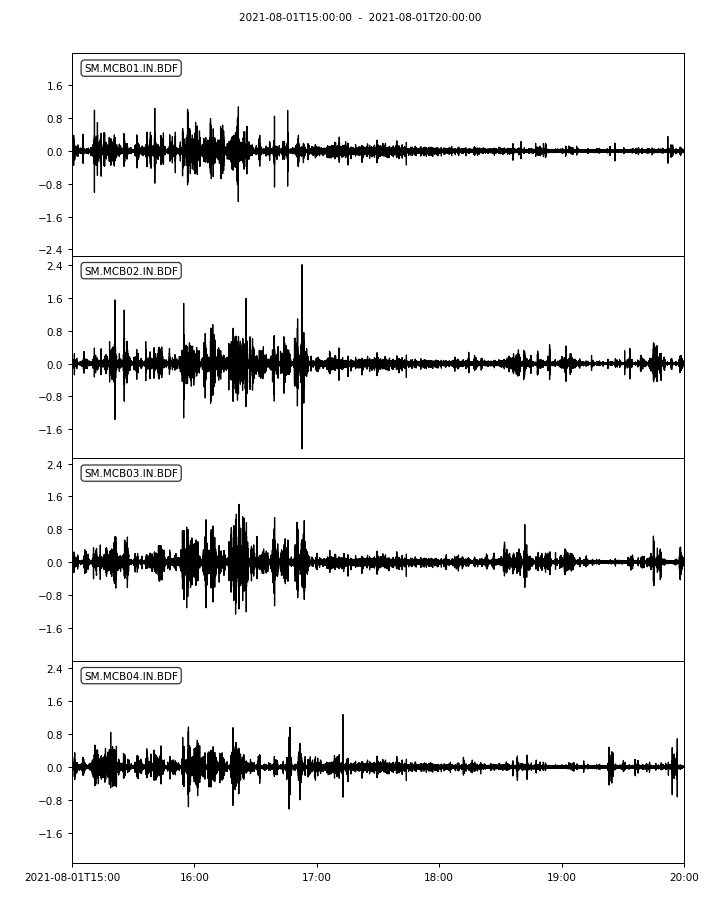

<IPython.core.display.Javascript object>


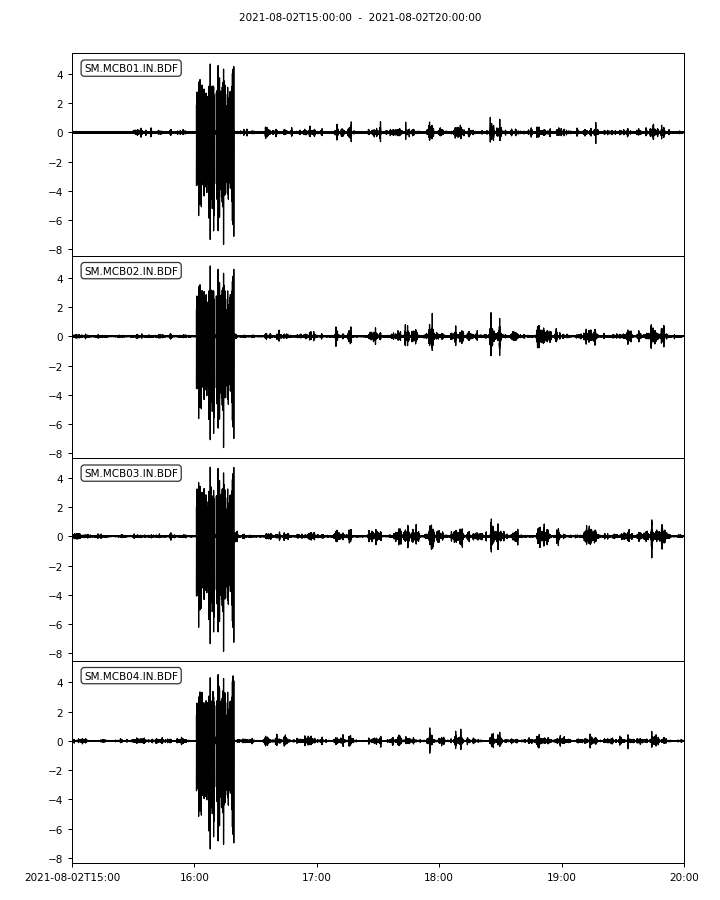

<IPython.core.display.Javascript object>


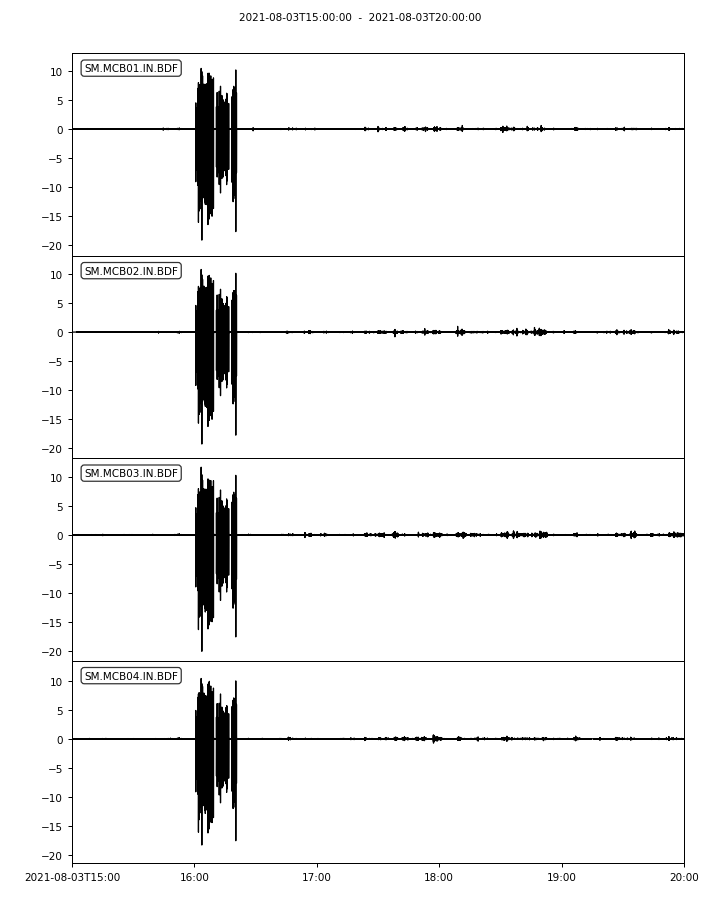

<IPython.core.display.Javascript object>


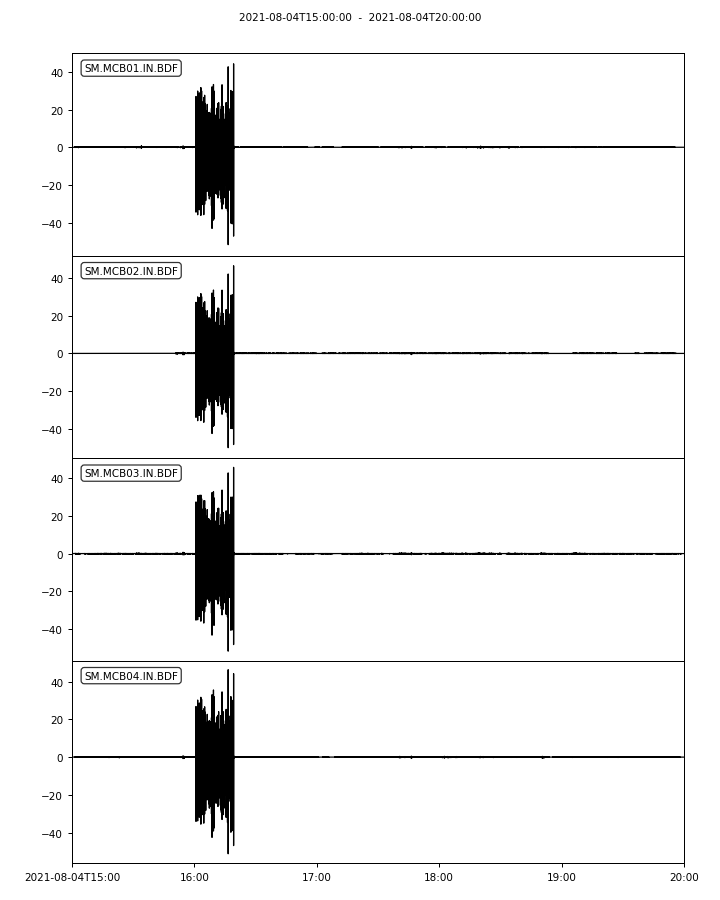

<IPython.core.display.Javascript object>


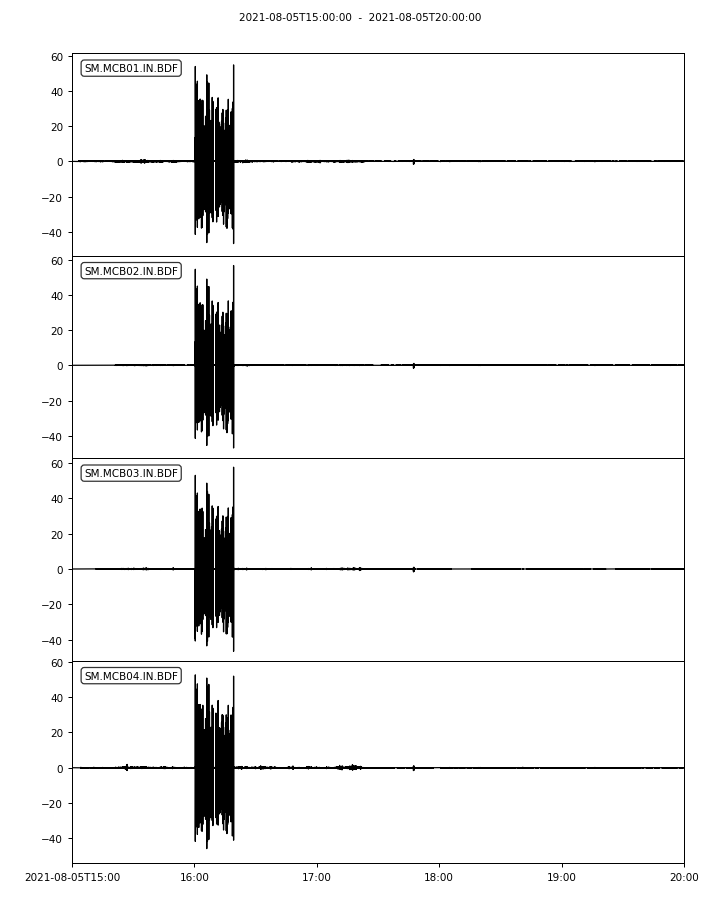

<IPython.core.display.Javascript object>


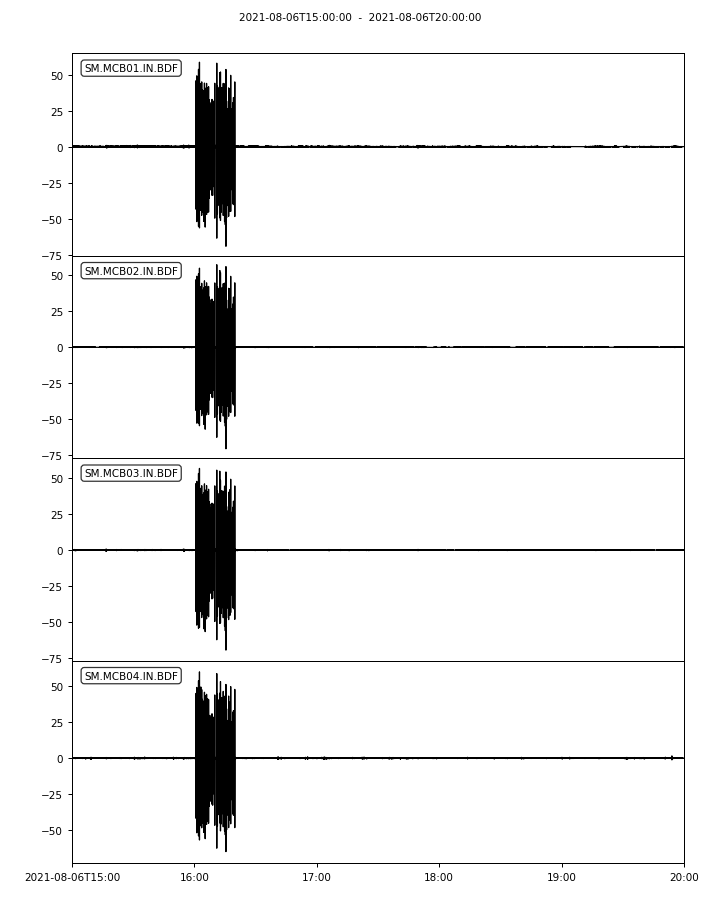

<IPython.core.display.Javascript object>


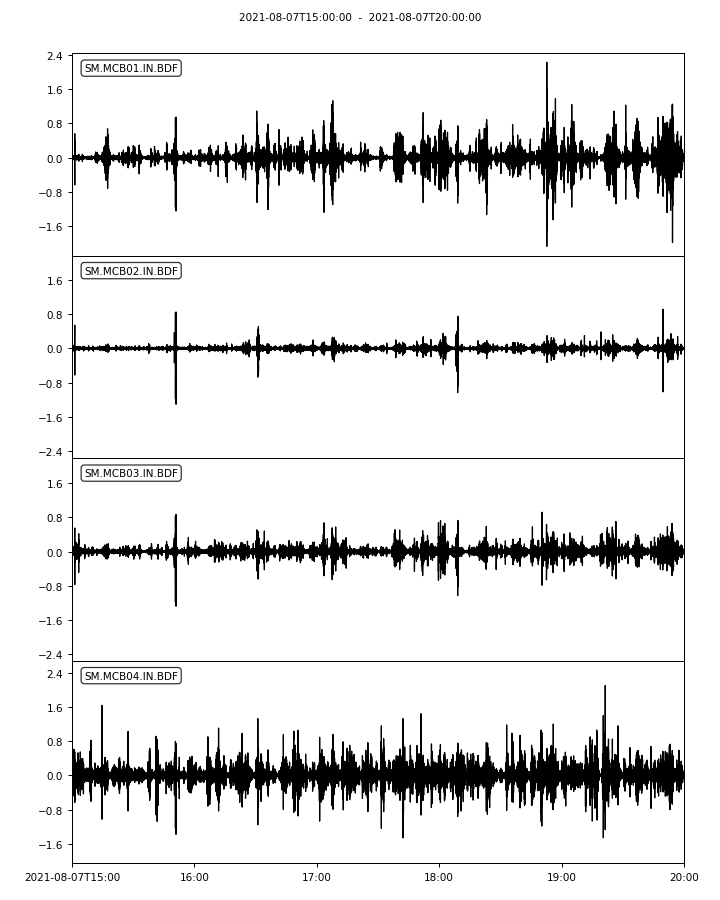

<IPython.core.display.Javascript object>


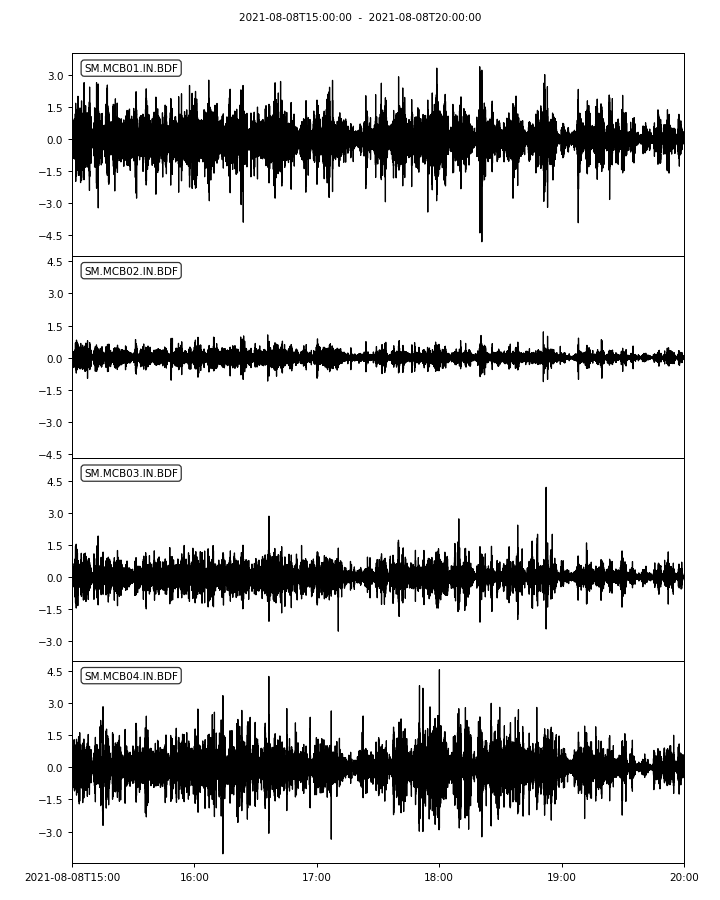

<IPython.core.display.Javascript object>


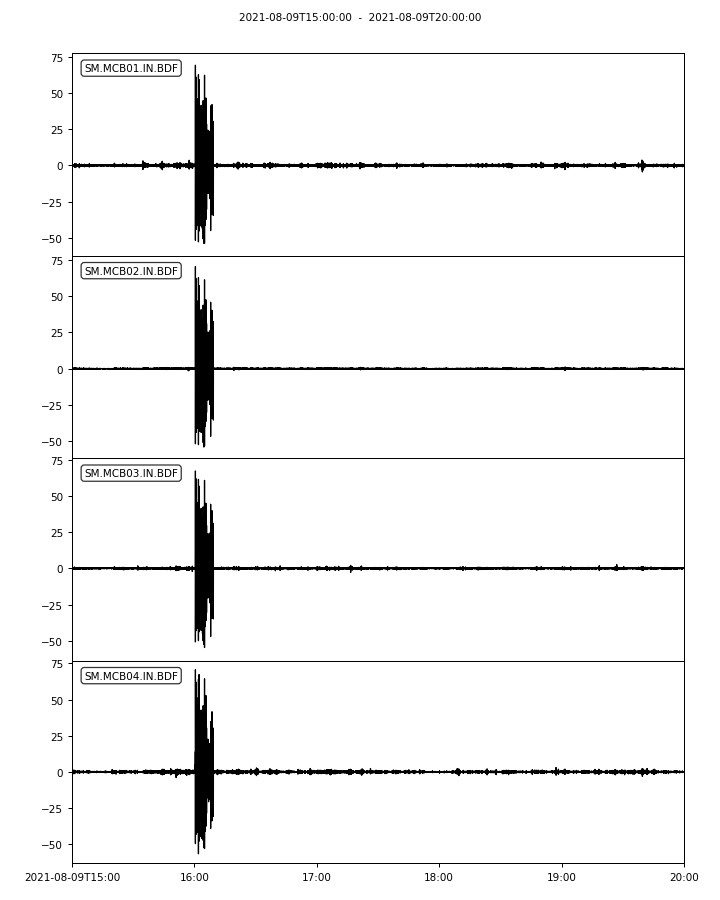

<IPython.core.display.Javascript object>


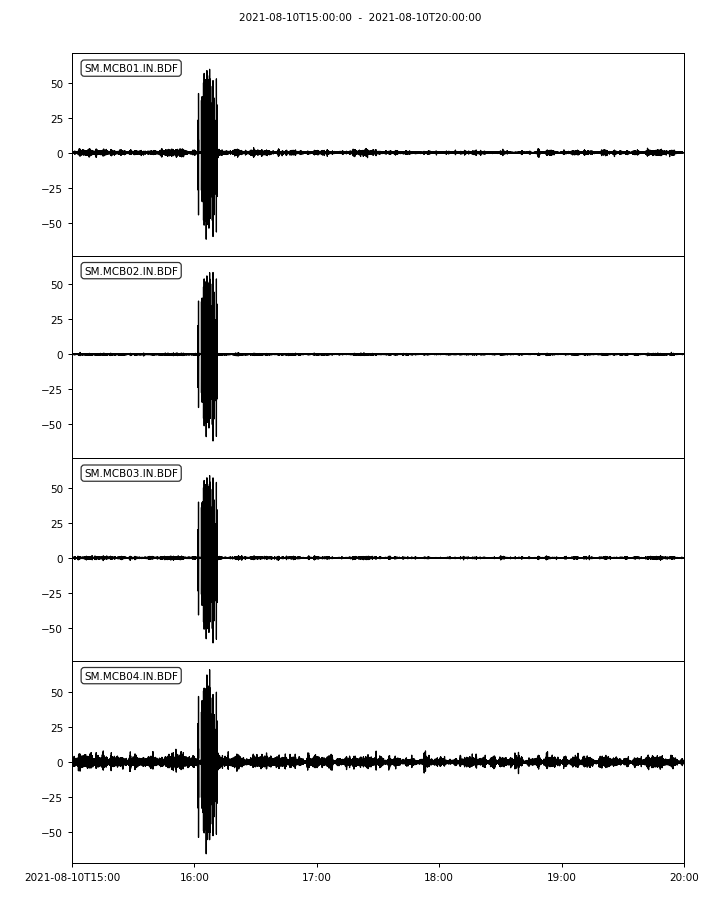

<IPython.core.display.Javascript object>


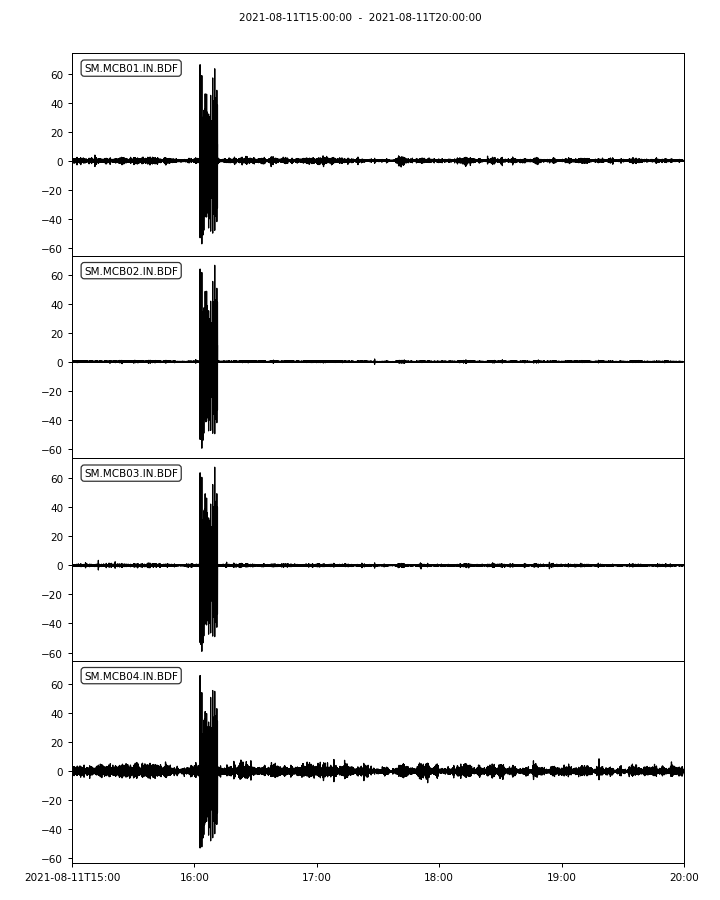

<IPython.core.display.Javascript object>


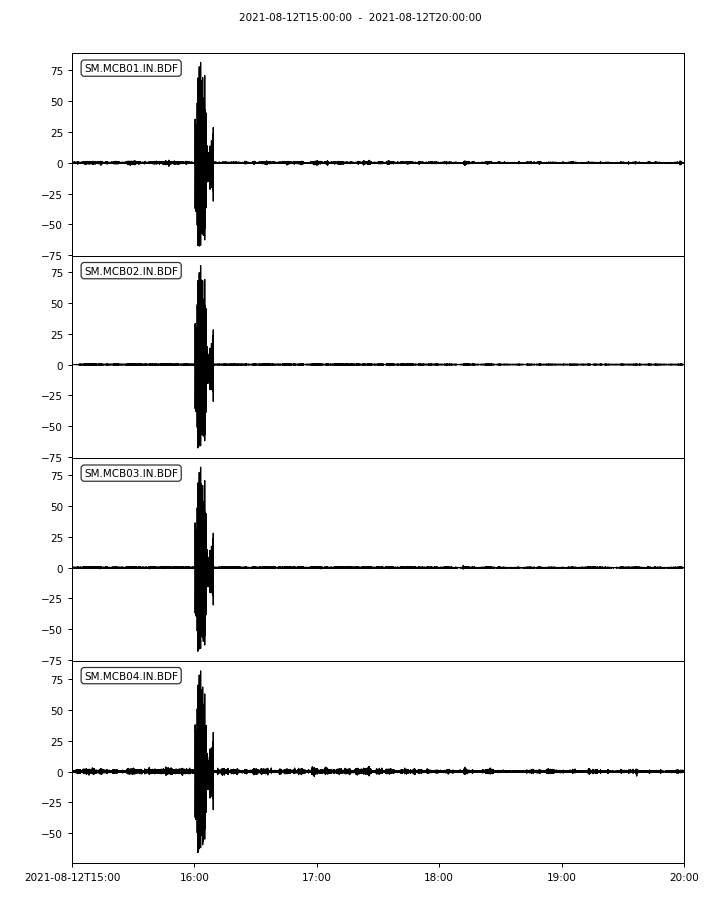

<IPython.core.display.Javascript object>


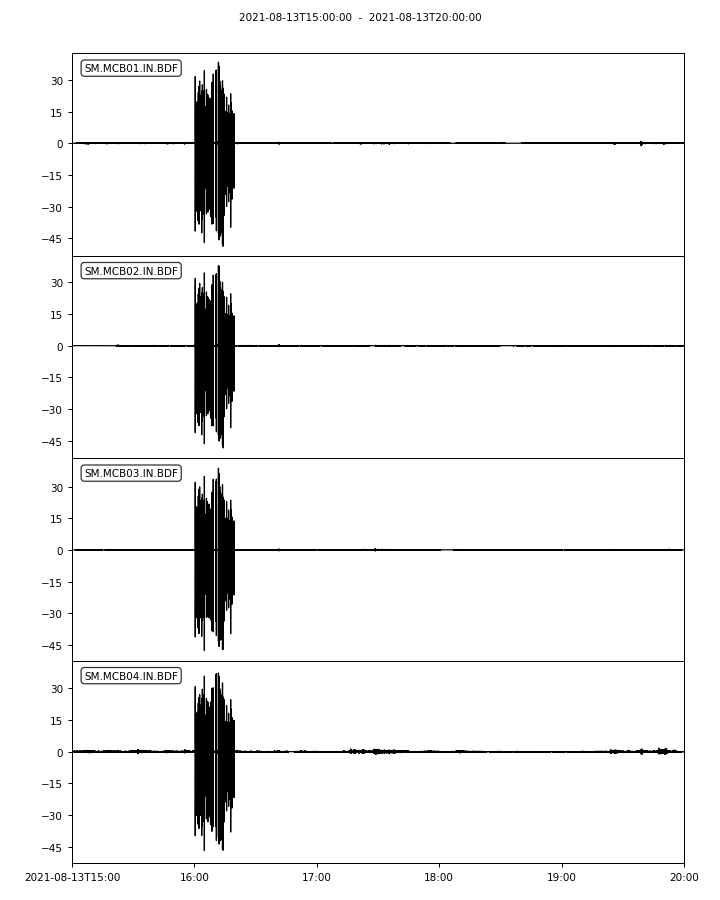

<IPython.core.display.Javascript object>


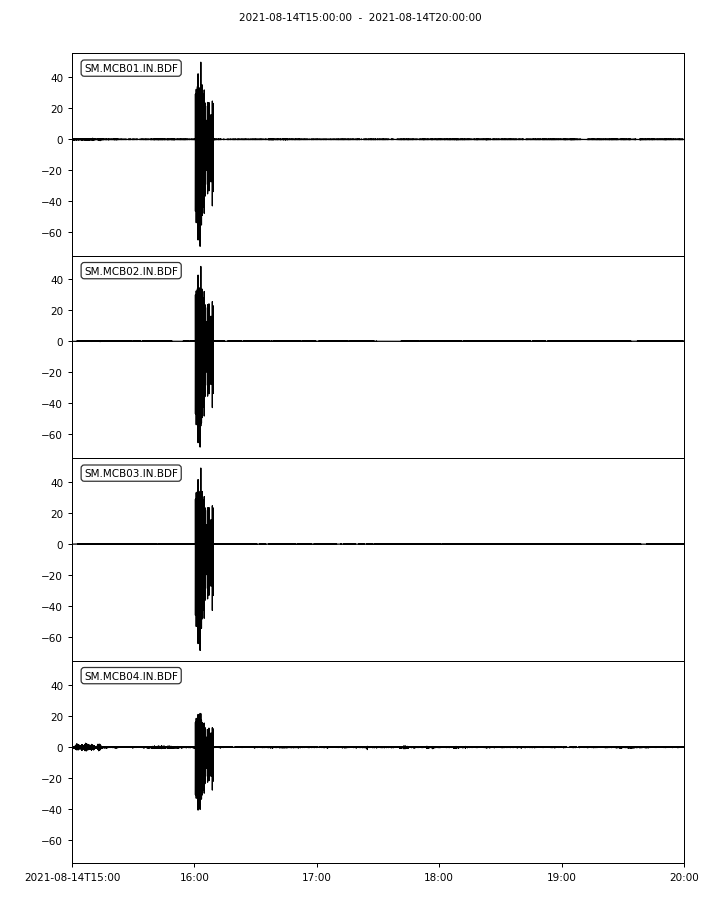

<IPython.core.display.Javascript object>


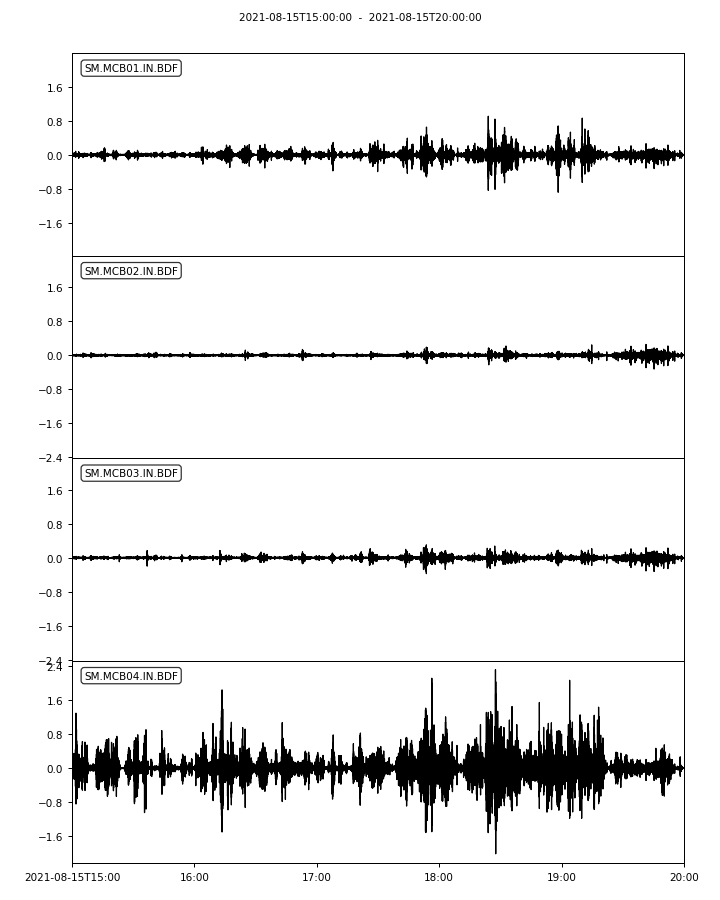

<IPython.core.display.Javascript object>


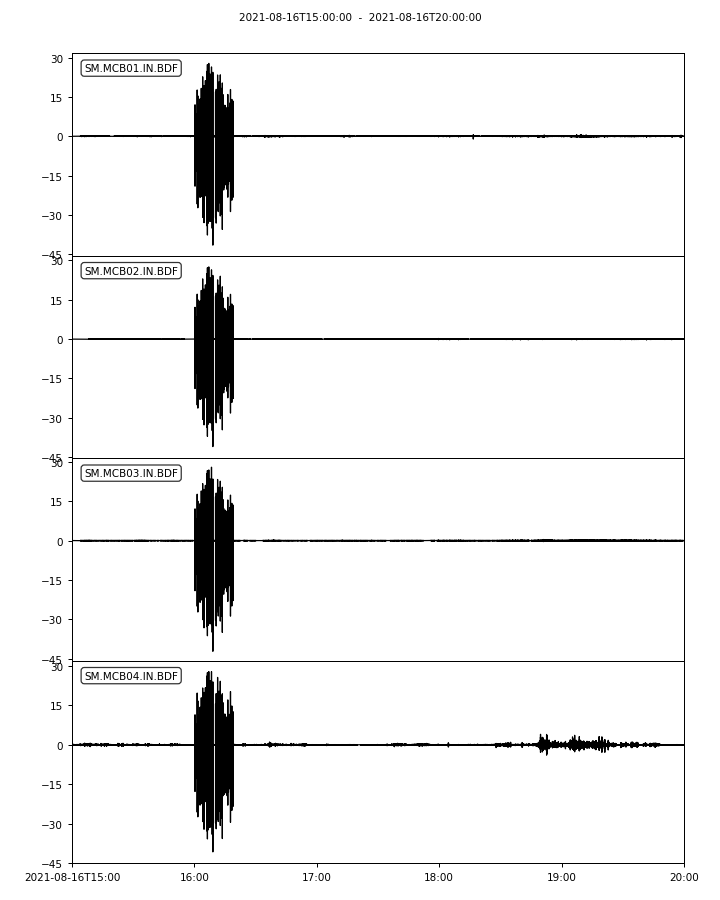

<IPython.core.display.Javascript object>


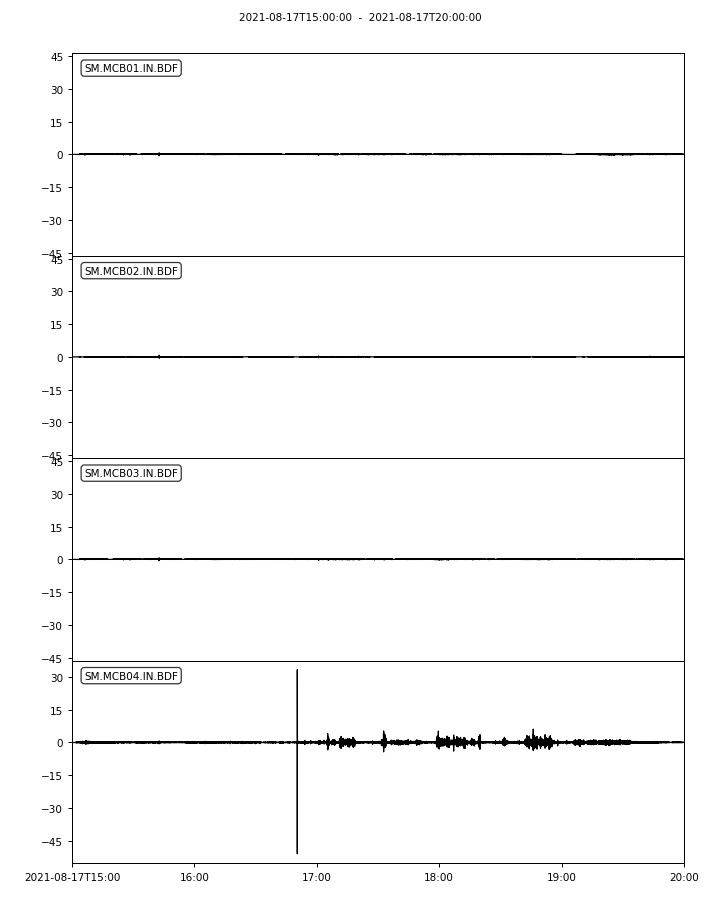

<IPython.core.display.Javascript object>


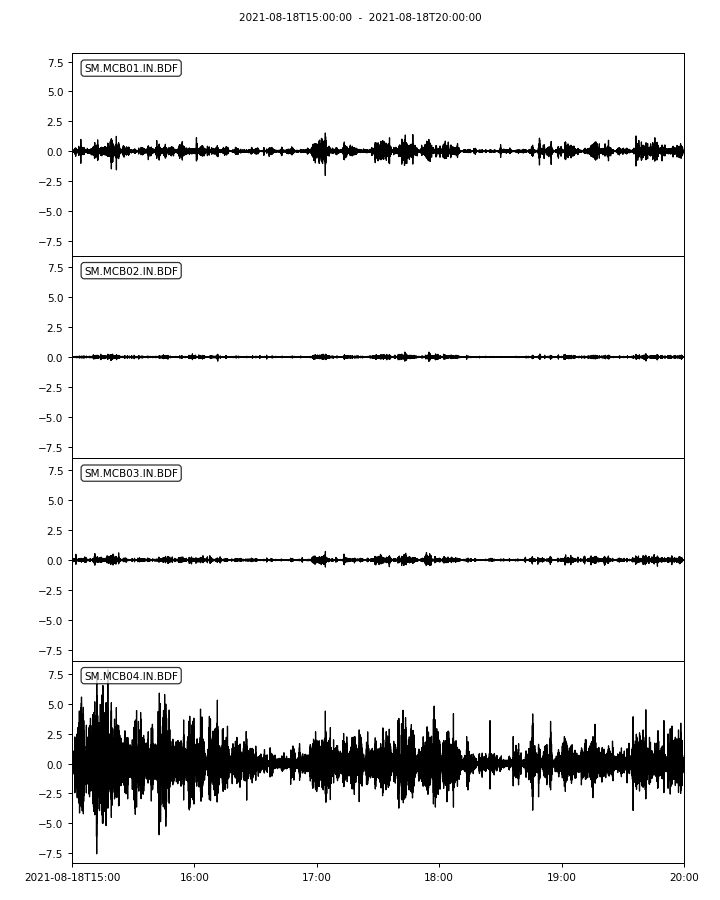

<IPython.core.display.Javascript object>


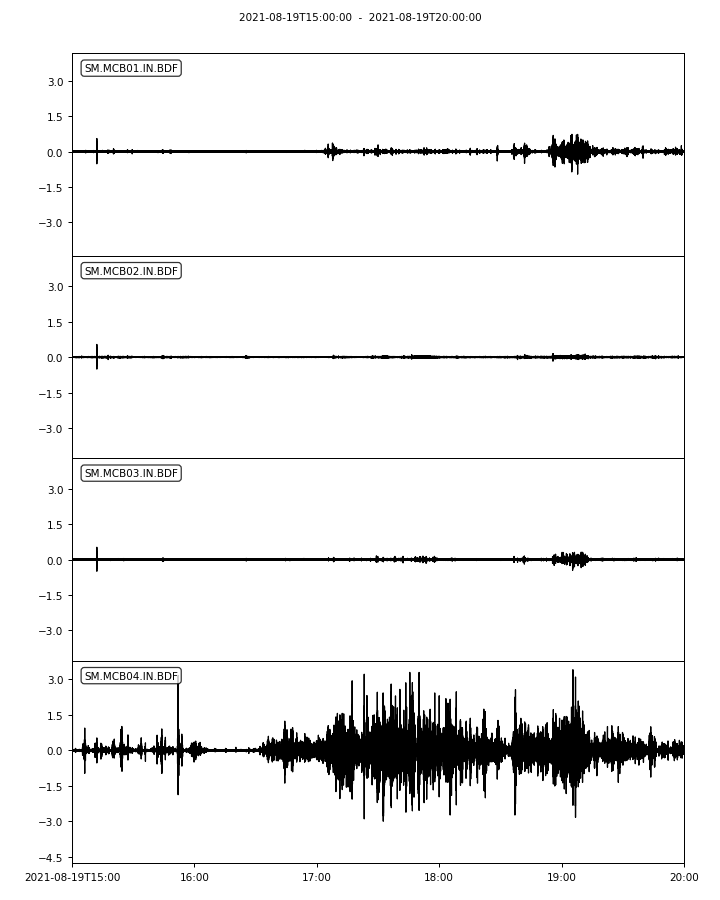

<IPython.core.display.Javascript object>


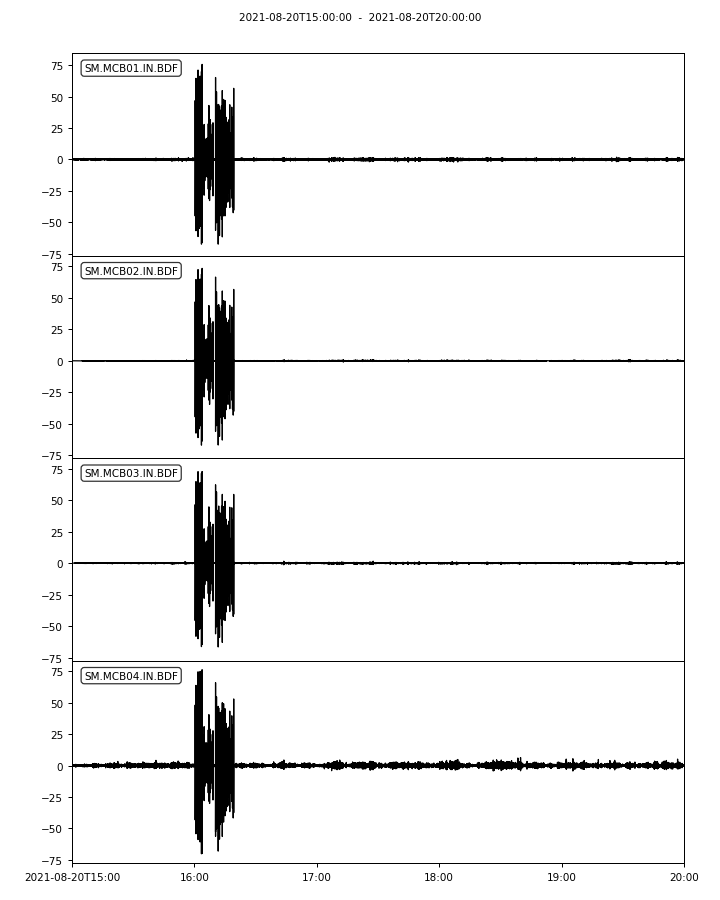

<IPython.core.display.Javascript object>


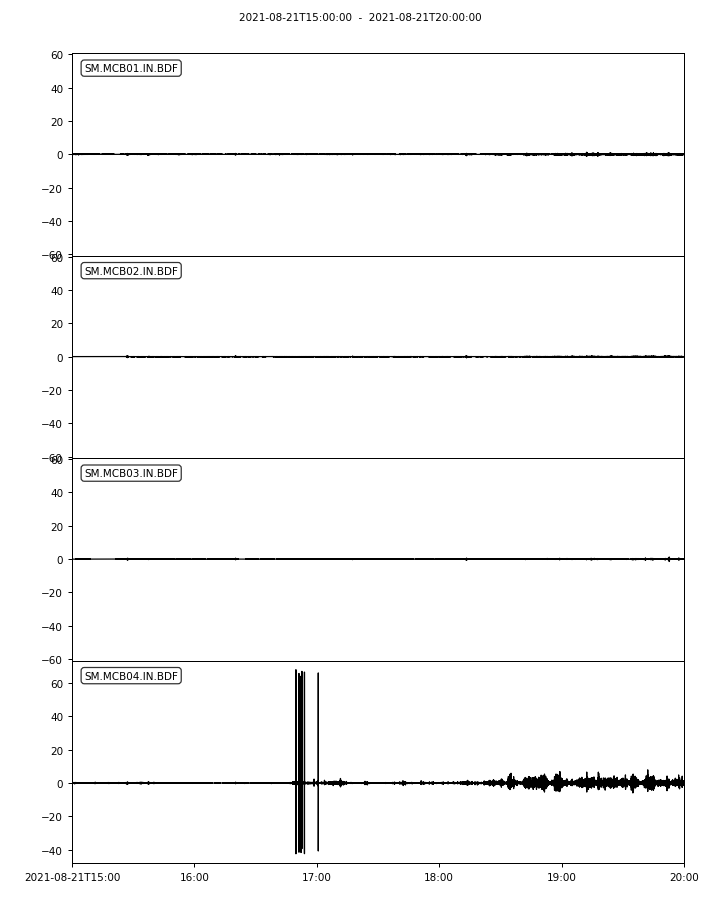

<IPython.core.display.Javascript object>


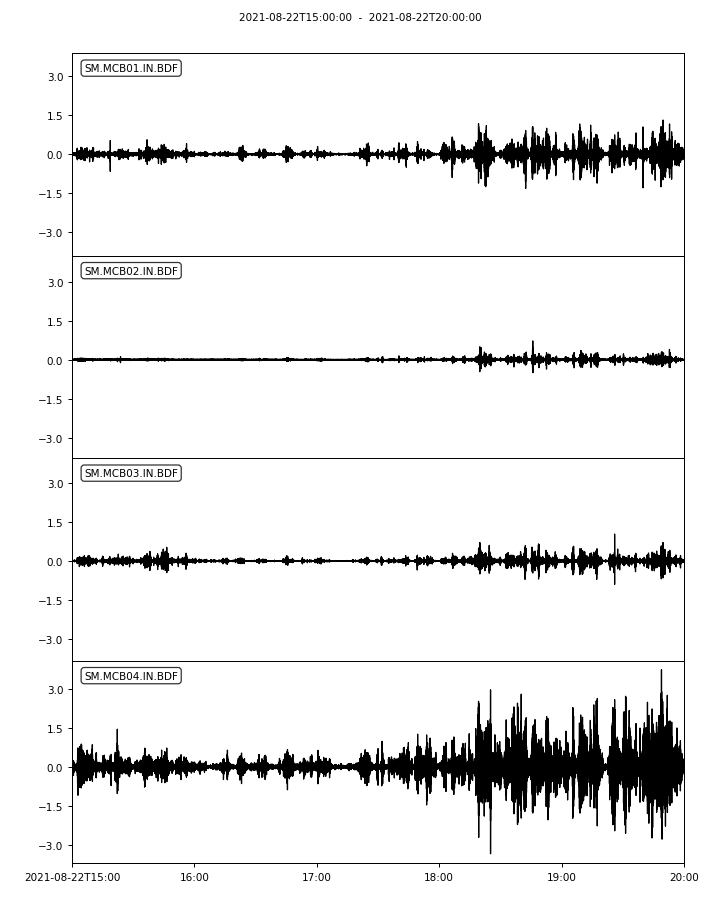

<IPython.core.display.Javascript object>


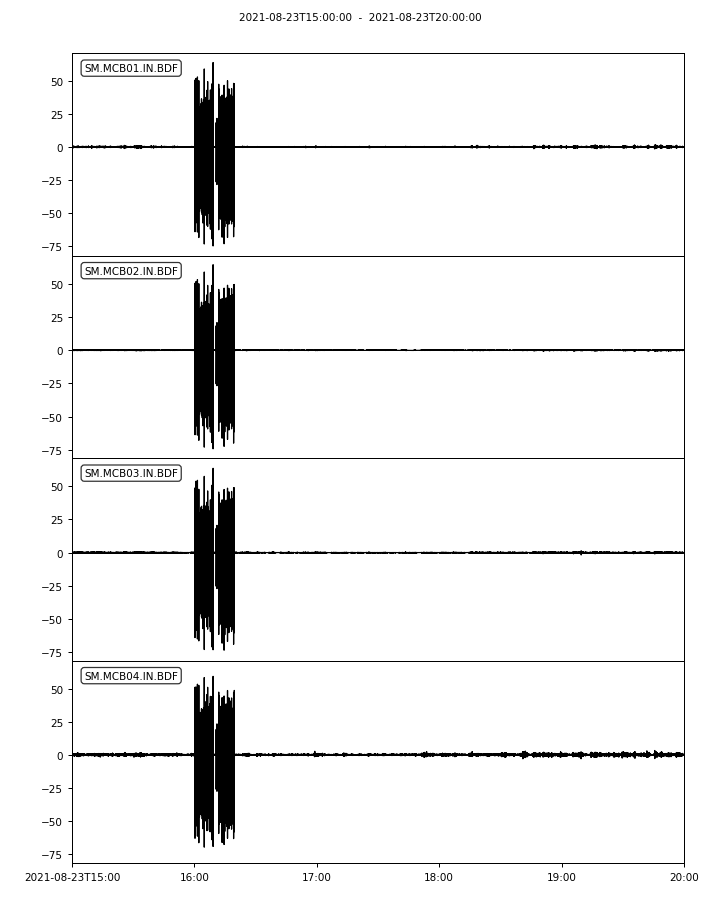

<IPython.core.display.Javascript object>


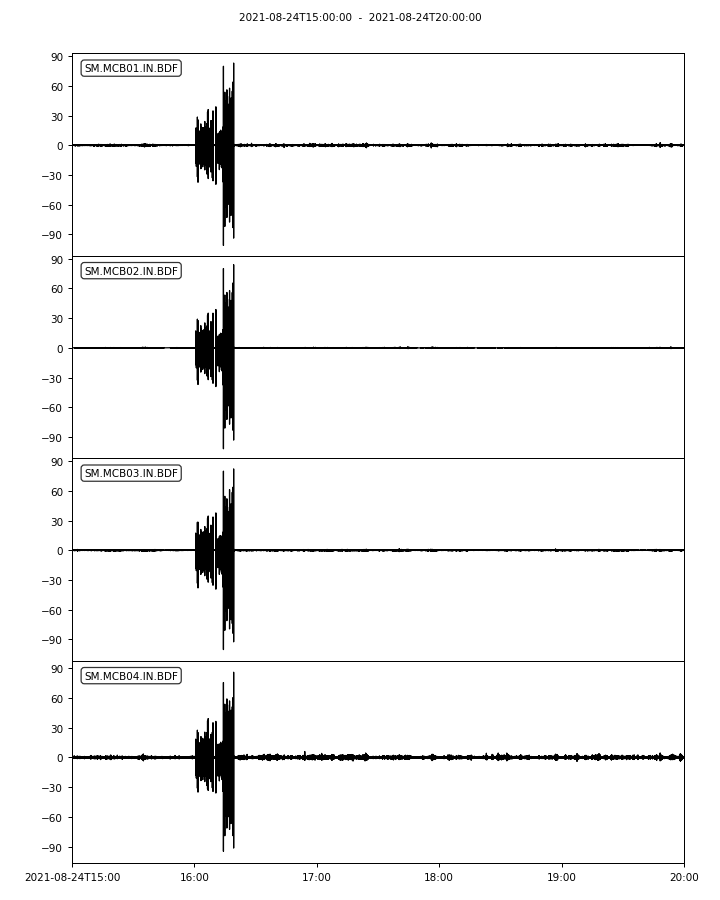

<IPython.core.display.Javascript object>


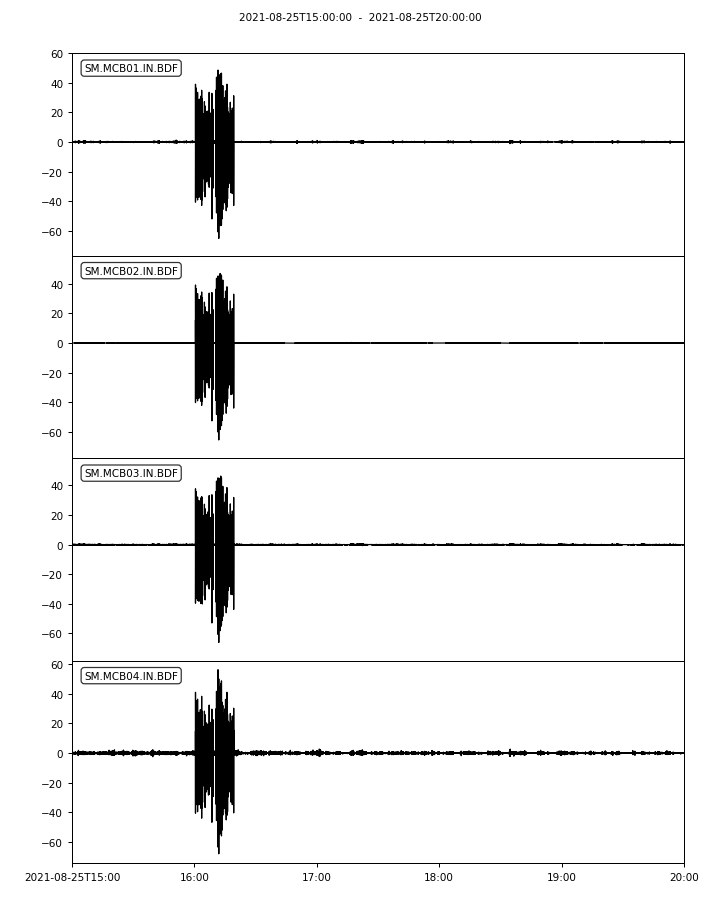

<IPython.core.display.Javascript object>


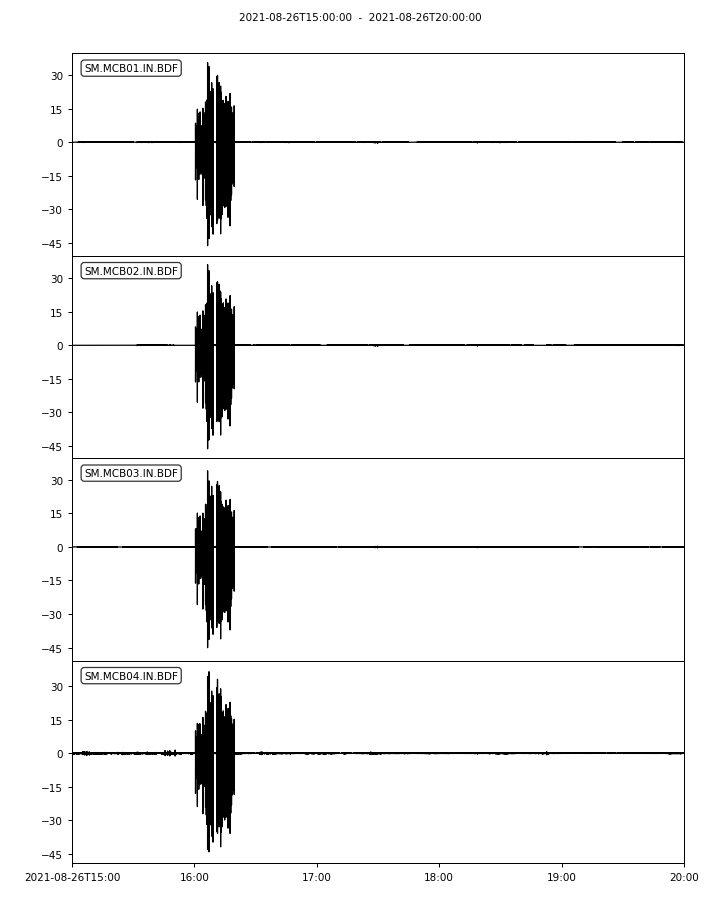

<IPython.core.display.Javascript object>


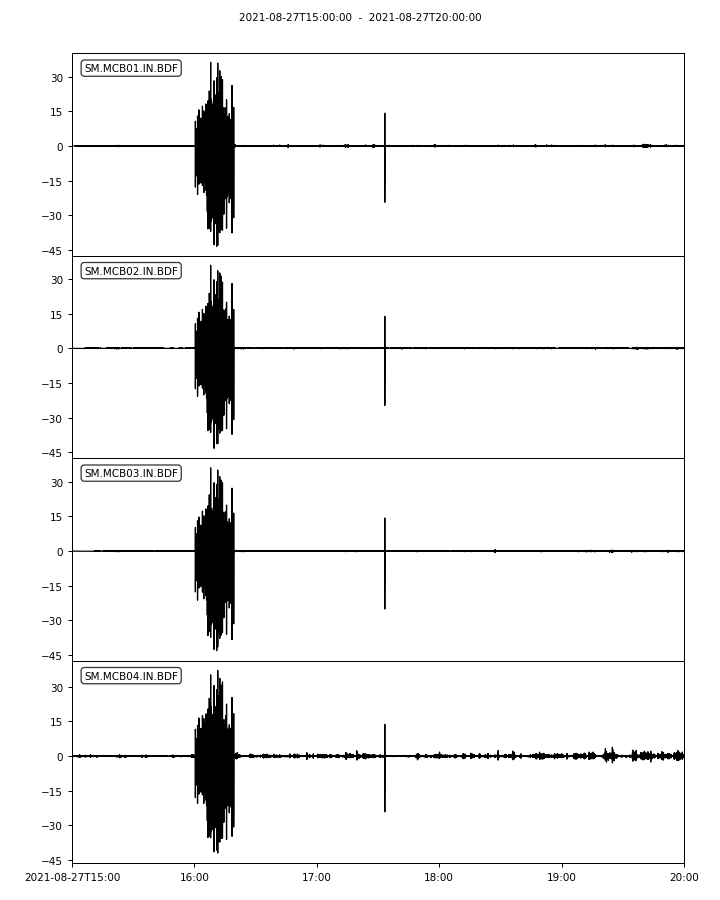

<IPython.core.display.Javascript object>


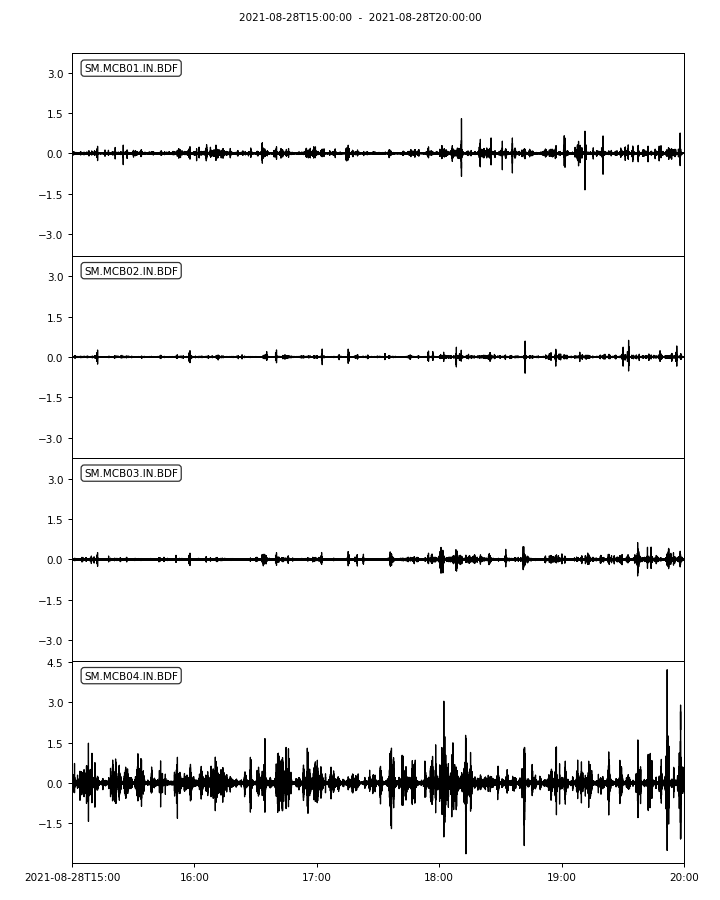

<IPython.core.display.Javascript object>


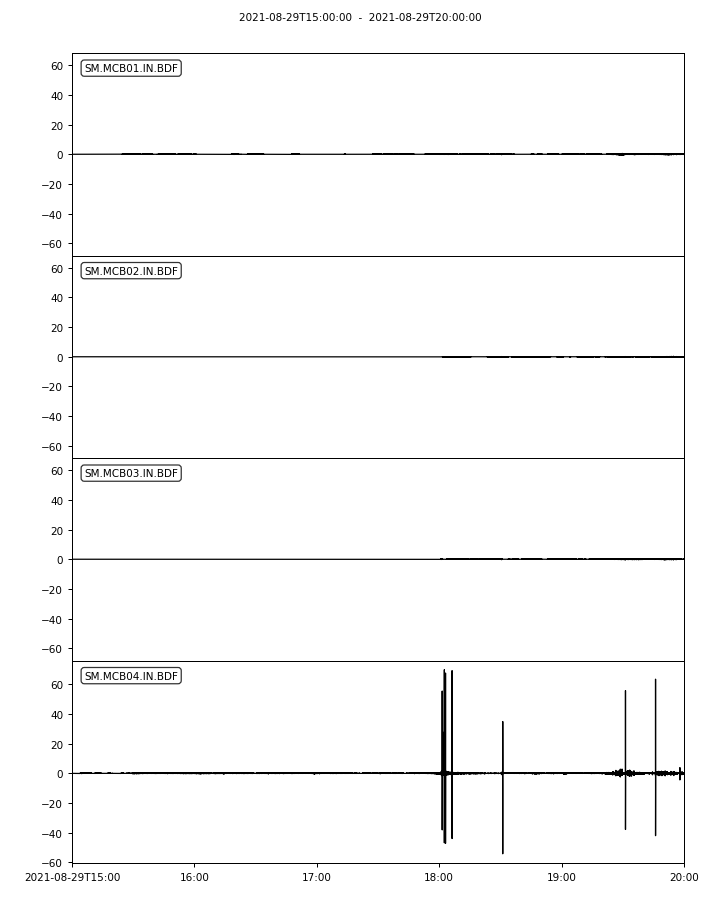

<IPython.core.display.Javascript object>


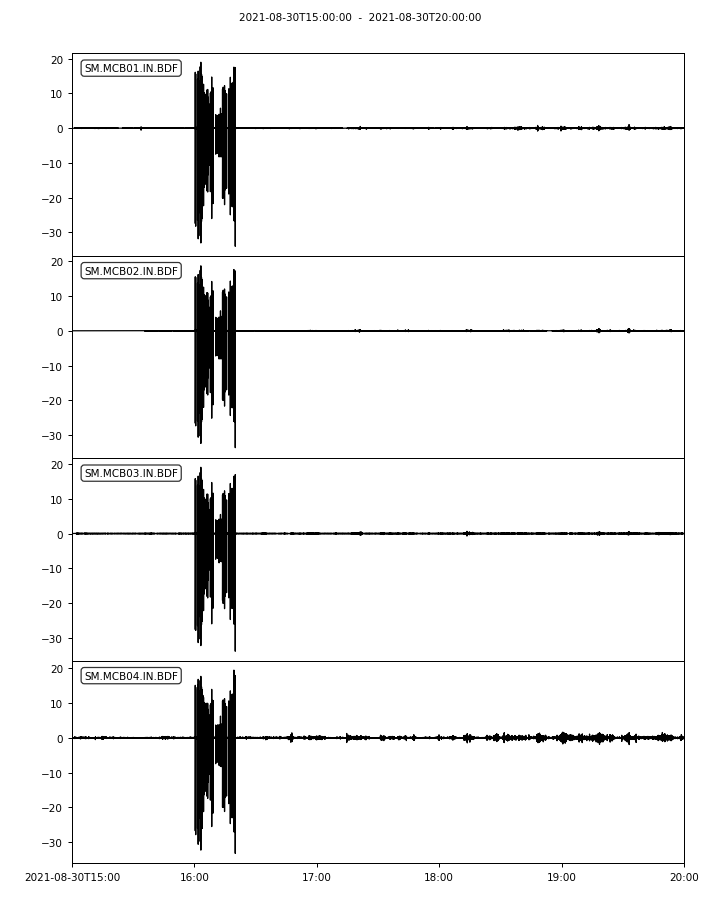

<IPython.core.display.Javascript object>


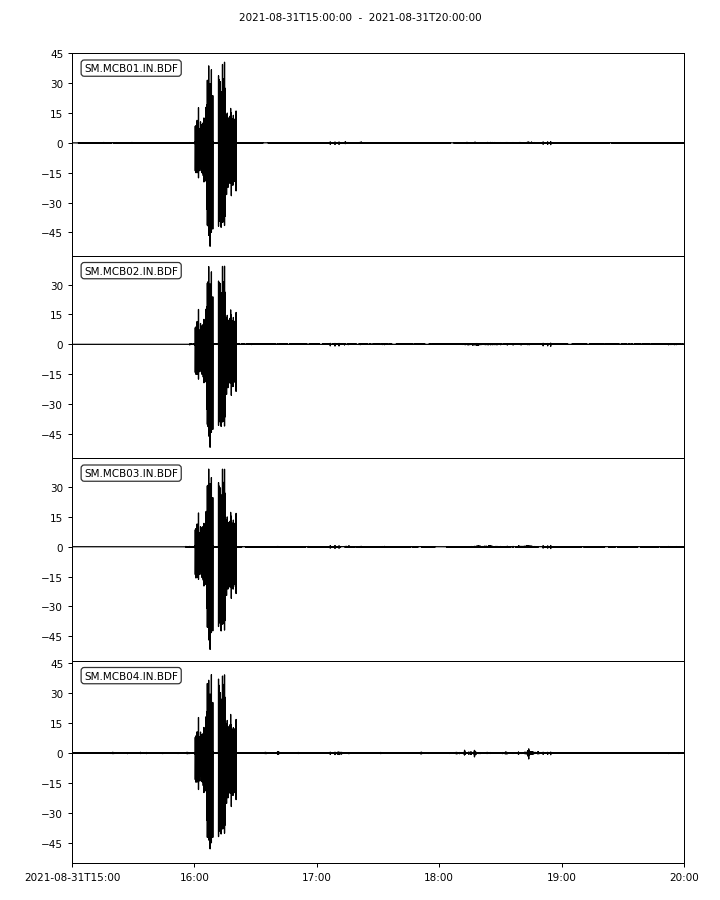

<IPython.core.display.Javascript object>


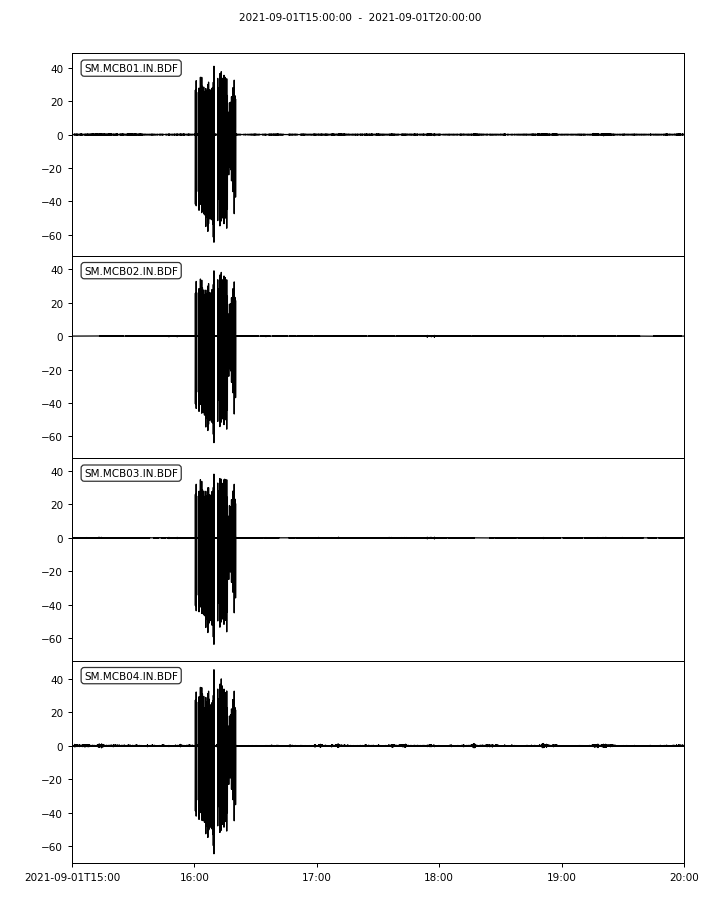

<IPython.core.display.Javascript object>


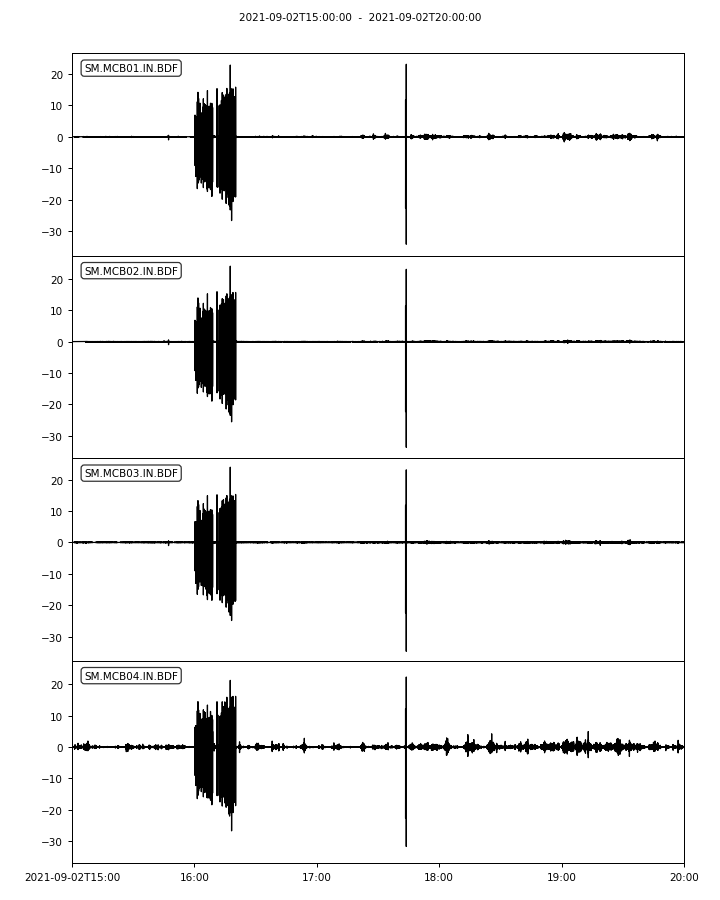

<IPython.core.display.Javascript object>


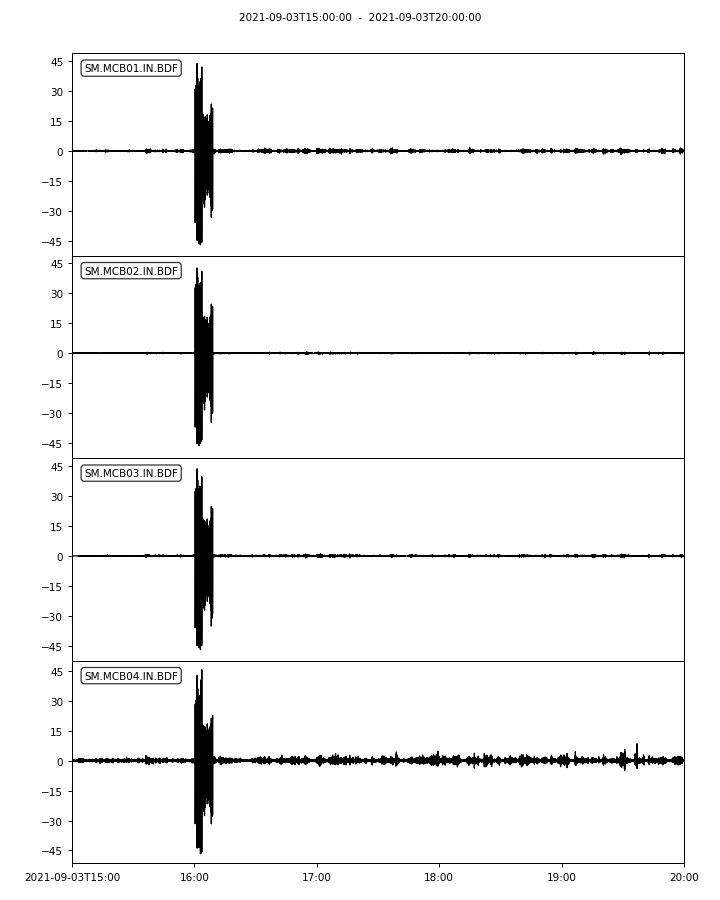

<IPython.core.display.Javascript object>


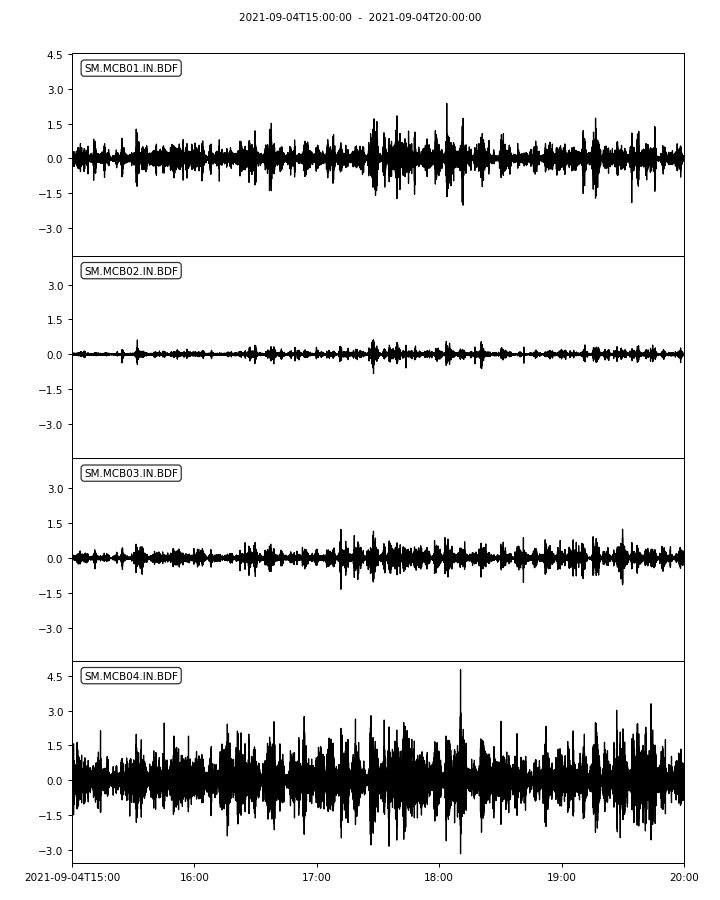

<IPython.core.display.Javascript object>


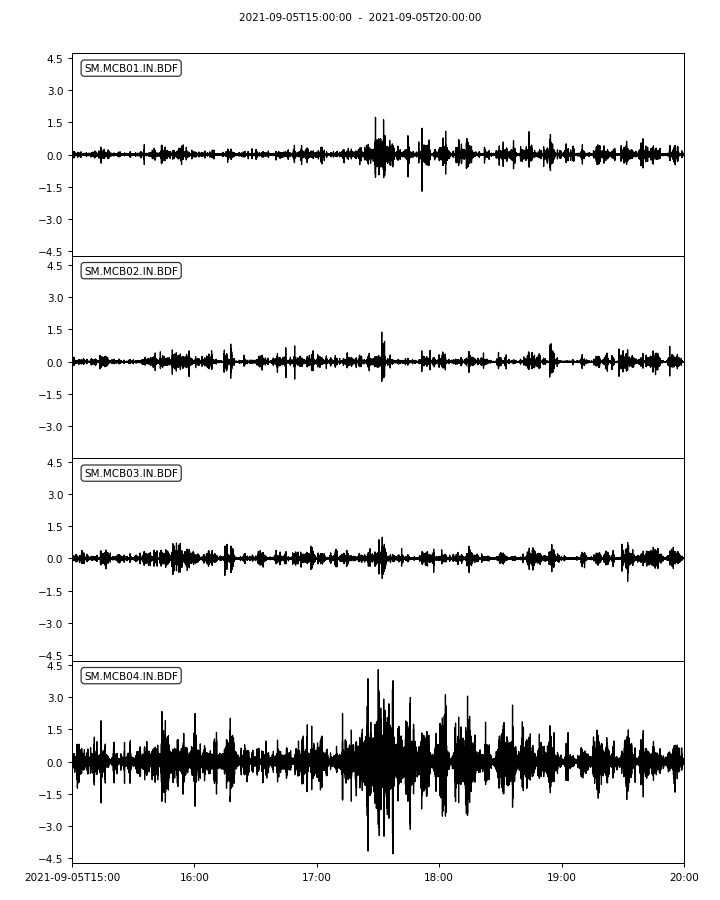

<IPython.core.display.Javascript object>


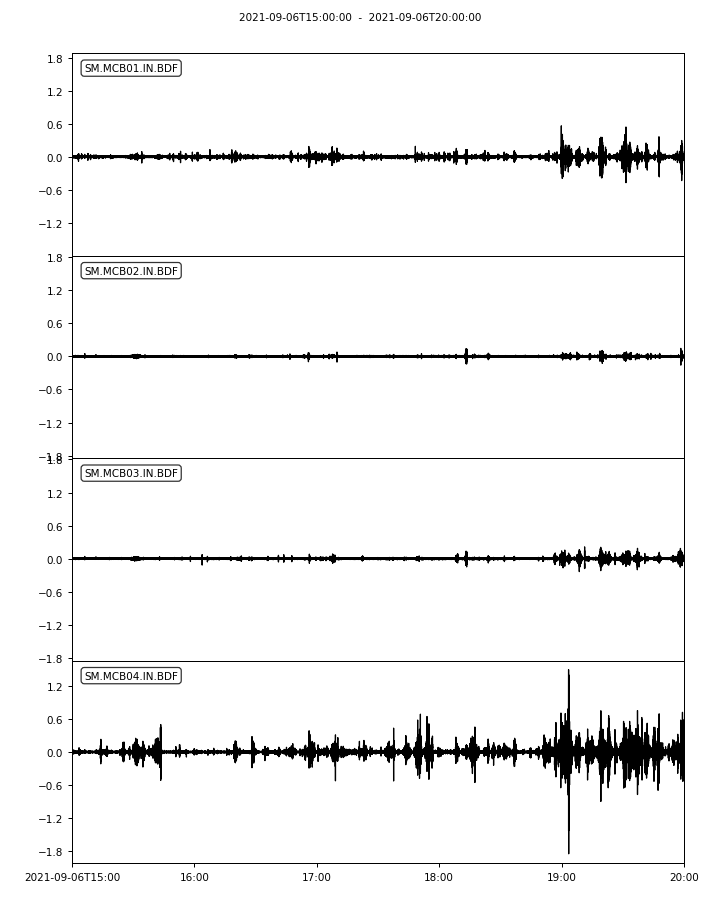

<IPython.core.display.Javascript object>


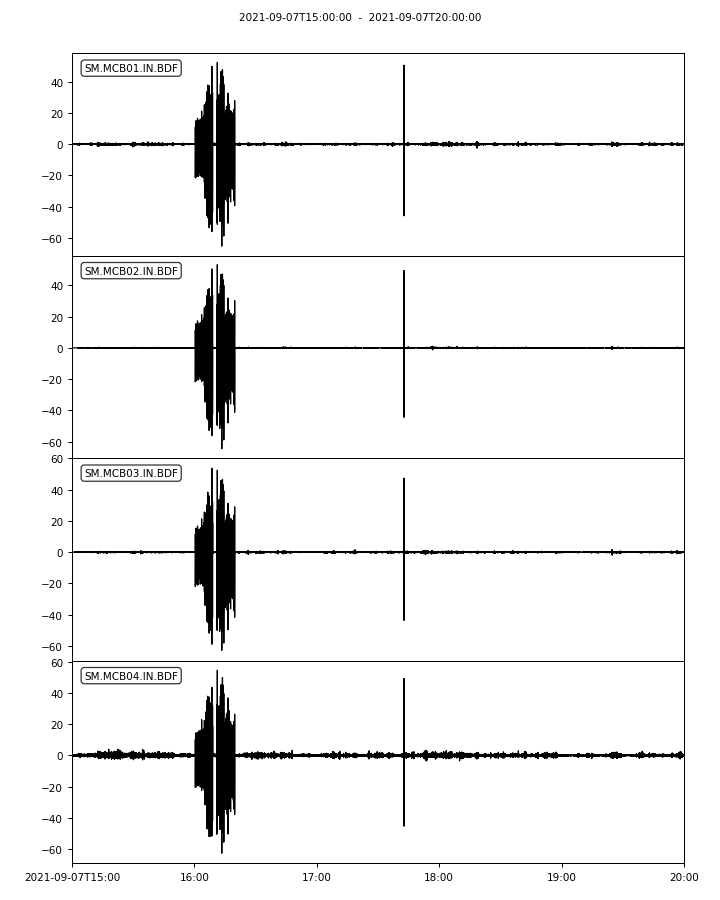

<IPython.core.display.Javascript object>


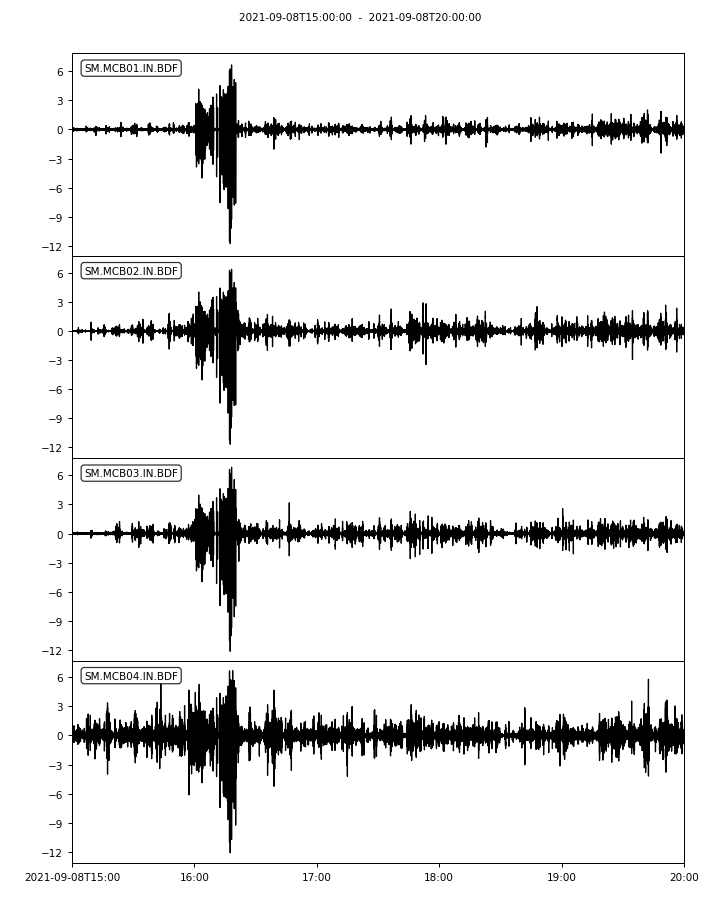

<IPython.core.display.Javascript object>


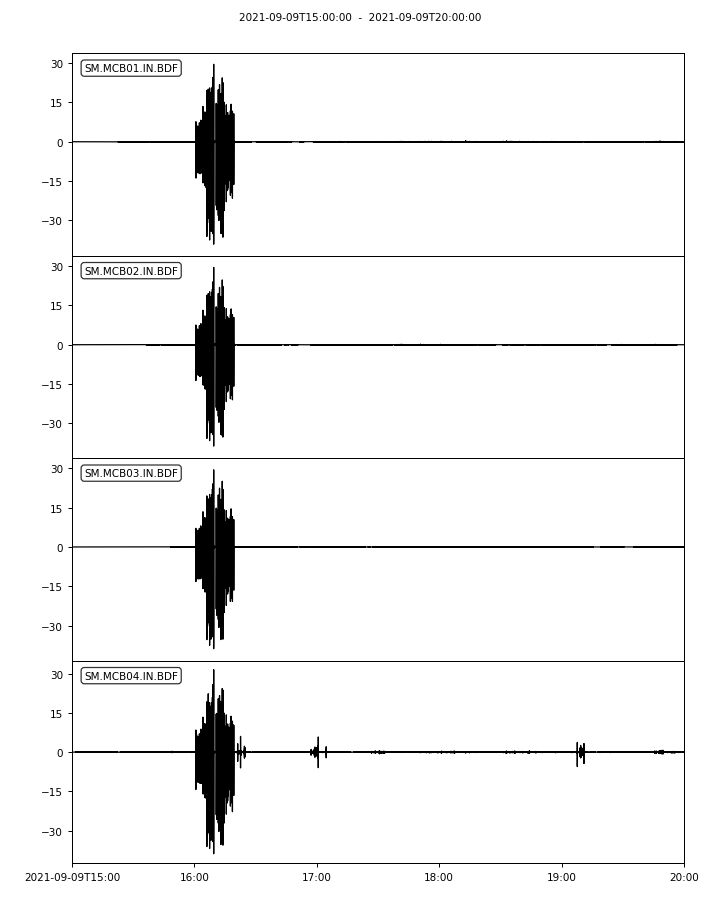

<IPython.core.display.Javascript object>


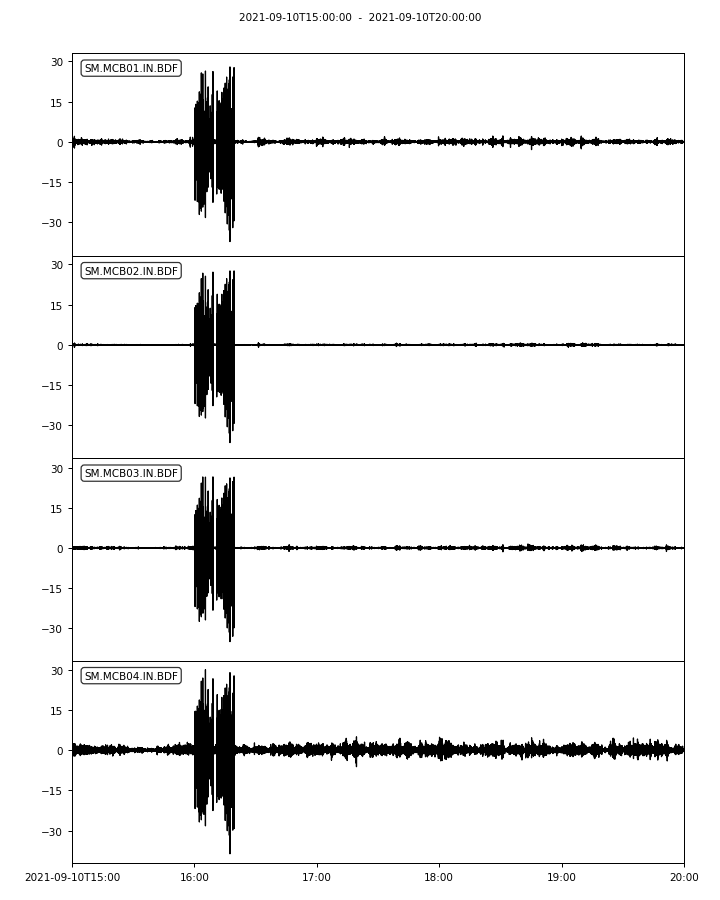

<IPython.core.display.Javascript object>


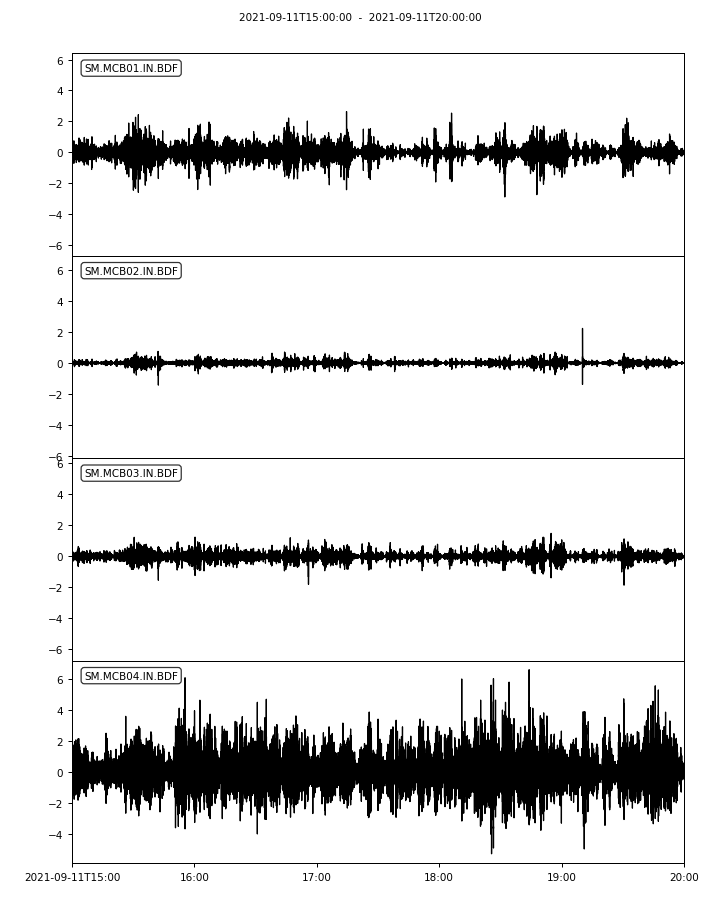

<IPython.core.display.Javascript object>


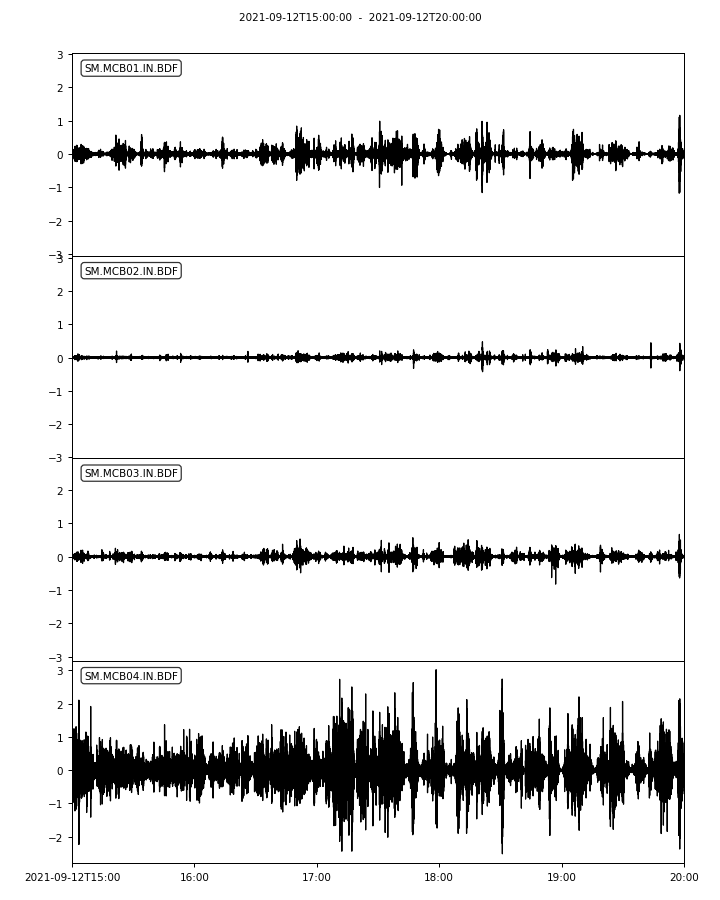

<IPython.core.display.Javascript object>


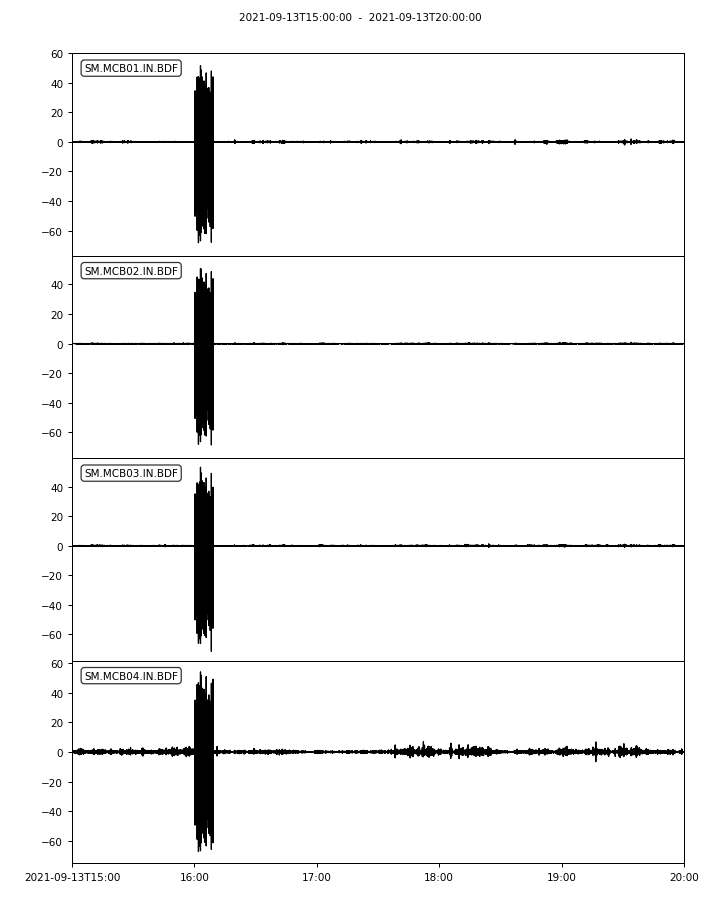

In [2]:
%matplotlib notebook
julian_days_1 = np.arange(159,209,1) 
julian_days_2 = np.arange(209,257,1) 
for day in julian_days_2:
    # Trim stream - detonations occur mid-day
    if (day >= 159) and (day <= 181): # June
        day_tmp = day - 151
        startTime = UTCDateTime('2021-06-'+str(day_tmp)+'T15:00:00')
        endTime = UTCDateTime('2021-06-'+str(day_tmp)+'T20:00:00')
    elif (day > 181) and (day <= 212): # July
        day_tmp = day - 181
        startTime = UTCDateTime('2021-07-'+str(day_tmp)+'T15:00:00')
        endTime = UTCDateTime('2021-07-'+str(day_tmp)+'T20:00:00')
    elif (day > 212) and (day <= 243): # August
        day_tmp = day - 212
        startTime = UTCDateTime('2021-08-'+str(day_tmp)+'T15:00:00')
        endTime = UTCDateTime('2021-08-'+str(day_tmp)+'T20:00:00')
    elif day > 243: # September
        day_tmp = day - 243
        startTime = UTCDateTime('2021-09-'+str(day_tmp)+'T15:00:00')
        endTime = UTCDateTime('2021-09-'+str(day_tmp)+'T20:00:00')
    #-----------------------------------------------------------------------------------------------------------------------#
    # Read data
    st = mcaap.read_data(day=day, data_dir=MCB_dir, loc_dir=MCB_dir+'MCB_BDF_Locations.txt', MCB=True)
    #-----------------------------------------------------------------------------------------------------------------------#
    # Filter trimmed stream to help determine start time
    st.trim(startTime, endTime)
    st_filt = st.copy()
    st_filt.taper(type='cosine', max_percentage=0.05, max_length=60)
    try:
        st_filt.filter('bandpass', freqmin=1, freqmax=10)
    except:
        st_filt = st_filt.split()
        st_filt.filter('bandpass', freqmin=1, freqmax=10)
        st_filt.merge()
    #-----------------------------------------------------------------------------------------------------------------------#
    # Plot filtered stream and save
    st_filt.plot(handle=True, method='full', type='normal', equal_scale=True);

Dates were determined after analyzing array data and looking for detections.

In [411]:
date_format = '%Y/%m/%d'
dets_dates = ['2021/06/08','2021/06/09','2021/06/10','2021/06/11','2021/06/14',
              '2021/06/15','2021/06/16','2021/06/17','2021/06/18','2021/06/19',
              '2021/06/22','2021/06/23','2021/06/24','2021/06/25','2021/06/28',
              '2021/06/29','2021/06/30','2021/07/01','2021/07/06','2021/07/07',
              '2021/07/08','2021/07/09','2021/07/12','2021/07/13','2021/07/14',
              '2021/07/15','2021/07/19','2021/07/20','2021/07/21','2021/07/22',
              '2021/07/23','2021/07/26','2021/07/27','2021/07/28','2021/07/29',
              '2021/07/30','2021/08/02','2021/08/03','2021/08/04','2021/08/05',
              '2021/08/06','2021/08/09','2021/08/10','2021/08/11','2021/08/12',
              '2021/08/13','2021/08/14','2021/08/16','2021/08/20','2021/08/23',
              '2021/08/24','2021/08/25','2021/08/26','2021/08/27','2021/08/30',
              '2021/08/31','2021/09/01','2021/09/02','2021/09/03','2021/09/07',
              '2021/09/08','2021/09/09','2021/09/10','2021/09/13']
dets_start = ['16:40:00','16:55:00','16:10:00','17:05:00','15:55:00',
              '15:55:00','15:55:00','15:55:00','15:55:00','15:55:00',
              '15:55:00','15:55:00','15:55:00','15:55:00','15:55:00',
              '16:20:00','15:55:00','15:55:00','15:55:00','15:55:00',
              '15:55:00','15:55:00','15:55:00','15:55:00','15:55:00',
              '15:55:00','16:25:00','16:00:00','15:55:00','15:55:00',
              '15:55:00','15:55:00','15:55:00','15:55:00','15:55:00',
              '15:55:00','15:55:00','15:55:00','15:55:00','15:55:00',
              '15:55:00','15:55:00','16:00:00','16:00:00','15:55:00',
              '15:55:00','15:55:00','15:55:00','15:55:00','15:55:00',
              '15:55:00','15:55:00','15:55:00','15:55:00','15:55:00',
              '15:55:00','15:55:00','15:55:00','15:55:00','15:55:00',
              '15:55:00','15:55:00','15:55:00','15:55:00']
dets_end = ['17:10:00','17:25:00','16:40:00','17:35:00','16:15:00',
            '16:15:00','16:15:00','16:15:00','16:30:00','16:15:00',
            '16:25:00','16:25:00','16:25:00','16:25:00','16:25:00',
            '16:50:00','16:25:00','16:25:00','16:25:00','16:25:00',
            '16:25:00','16:25:00','16:25:00','16:25:00','16:25:00',
            '16:25:00','16:55:00','16:30:00','16:25:00','16:25:00',
            '16:25:00','16:25:00','16:25:00','16:25:00','16:25:00',
            '16:25:00','16:25:00','16:25:00','16:25:00','16:25:00',
            '16:25:00','16:15:00','16:15:00','16:15:00','16:15:00',
            '16:25:00','16:15:00','16:25:00','16:25:00','16:25:00',
            '16:25:00','16:25:00','16:25:00','16:25:00','16:25:00',
            '16:25:00','16:25:00','16:25:00','16:15:00','16:25:00',
            '16:25:00','16:25:00','16:25:00','16:15:00']

---
#### Further trimming streams (keep in mind that writing as mseed does not save location info)

In [412]:
%%time
# Further trimming and saving detections
dets_julian_days = []
for date, start, end in zip(dets_dates, dets_start, dets_end):
    st = Stream()
    # Trim stream - detonations occur mid-day
    startTime = UTCDateTime(date.replace('/','-') + 'T' + start)
    endTime = UTCDateTime(date.replace('/','-') + 'T' + end) 
    day = mcaap.YMD_to_JD(date_format, date)[0]; dets_julian_days.append(day)
    # Save start times
    with open(MCB_dir+'MCB_Detections/Signal_Times/UTC_Starttimes/'+str(day)+'.txt', 'w') as file:
        file.write(str(startTime))
    #-----------------------------------------------------------------------------------------------------------------------#
    # Read data
    st = mcaap.read_data(day=day, data_dir=MCB_dir, loc_dir=MCB_dir+'MCB_BDF_Locations.txt', MCB=True)
    #-----------------------------------------------------------------------------------------------------------------------#
    # Trim stream and save
    st.trim(startTime, endTime)
    try:
        st.write(MCB_dir+'MCB_Detections/Data/MCB_'+str(day)+'.mseed', format='MSEED')
    except:
        st = st.split().copy()
        st.write(MCB_dir+'MCB_Detections/Data/MCB_'+str(day)+'.mseed', format='MSEED')

CPU times: user 11 s, sys: 5.69 s, total: 16.7 s
Wall time: 27.4 s


## Blast Sequence Segmentation
---
#### Extracting times of signal peaks using CWT (find_peaks_cwt) to be used for time window construction

<IPython.core.display.Javascript object>


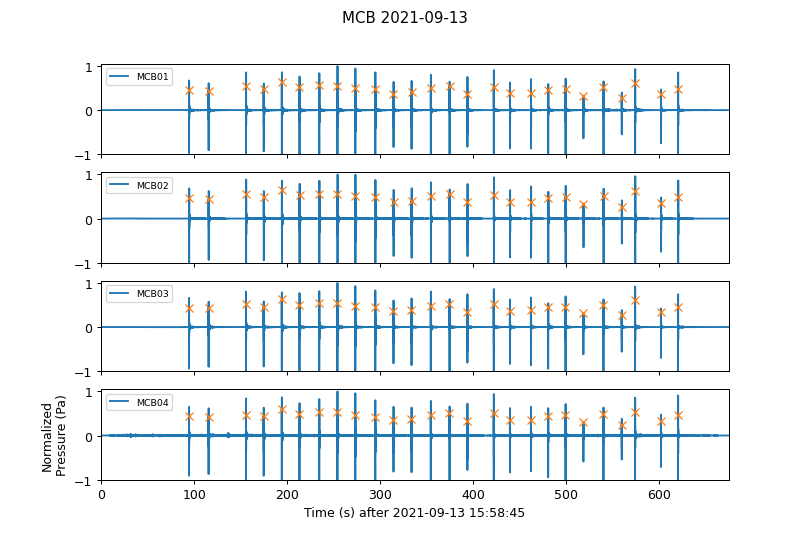

Peaks saved for MCB01 - BDF
Peaks saved for MCB02 - BDF
Peaks saved for MCB03 - BDF
Peaks saved for MCB04 - BDF
Figure saved
CPU times: user 34.9 s, sys: 522 ms, total: 35.4 s
Wall time: 35.5 s


In [408]:
%%time
%matplotlib notebook
mcaap.get_signal_times_cwt(day_idx=63, dets_julian_days=dets_julian_days, trim_from_start=225, trim_from_end=300, legend_loc='upper left', legend_size=7.5, MCB=True,
                           scales=[0.1,0.2,0.3,0.4,0.5], min_snr=10, min_distance_secs=12.5, find_peaks=True, save=True)

There has only been one instance of signals being separated by fewer than 10 seconds

Keep in mind, when using larger input sizes (e.g., larger time windows), the model will require greater complexity and thus larger dataset size